In [70]:
# from pyspark.sql import SparkSession
# import pyspark.pandas as ps
import numpy as np
import pandas as pd

import seaborn as sns

# spark = (
#     SparkSession.builder.appName("BNPL")
#     .config("spark.sql.repl.eagerEval.enabled", True) 
#     .config("spark.sql.parquet.cacheMetadata", "true")
#     .config("spark.driver.memory", "8g")
#     .getOrCreate()
# )

data_directory = "../data/"
tables_directory = data_directory + "tables/"
transactions_directory = tables_directory + "transactions_20210228_20210827_snapshot/"
merchants_file_loc = tables_directory + "tbl_merchants.parquet"

In [71]:
merchants = pd.read_parquet(merchants_file_loc)
transactions = pd.read_parquet(transactions_directory)
transactions = transactions.merge(merchants, how="left", on="merchant_abn")
transactions["order_datetime"] = pd.to_datetime(transactions["order_datetime"])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3643266 entries, 0 to 3643265
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   user_id         int64   
 1   merchant_abn    int64   
 2   dollar_value    float64 
 3   order_id        object  
 4   order_datetime  category
 5   name            object  
 6   tags            object  
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 201.5+ MB


In [72]:
transactions.head()

,user_id,merchant_abn,dollar_value,order_id,order_datetime,name,tags
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t..."
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28,Cursus Non Egestas Foundation,"[(furniture, home furnishings and equipment sh..."
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28,Id Erat Etiam Consulting,"[(gift, card, novelty, and souvenir shops), (b..."
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r..."
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28,Euismod Enim LLC,"([watch, clock, and jewelry repair shops], [b]..."


In [73]:
transactions.describe()

,user_id,merchant_abn,dollar_value
count,3.643266e+06,3.643266e+06,3.643266e+06
mean,1.203839e+04,5.542282e+10,1.662799e+02
std,6.951397e+03,2.532956e+10,5.205869e+02
min,1.000000e+00,1.002328e+10,9.756658e-08
25%,6.017000e+03,3.284414e+10,2.615198e+01
50%,1.203900e+04,5.528299e+10,6.223763e+01
75%,1.805300e+04,7.733862e+10,1.506123e+02
max,2.408100e+04,9.999054e+10,1.051939e+05


In [74]:
sample = transactions.sample(frac=1/10)
small_transactions = transactions[transactions["dollar_value"] <= 200]

<AxesSubplot:xlabel='dollar_value', ylabel='Count'>

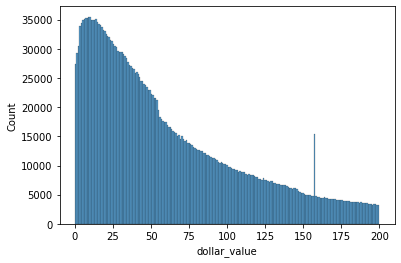

In [75]:
sns.histplot(data=small_transactions, x="dollar_value")

In [76]:
transactions_per_day = transactions.groupby("order_datetime").count()
dollar_value_per_day = transactions.groupby("order_datetime").sum()["dollar_value"]

<AxesSubplot:xlabel='order_datetime', ylabel='dollar_value'>

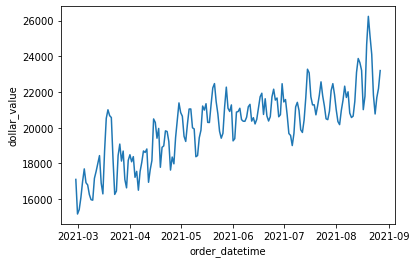

In [77]:
sns.lineplot(data=transactions_per_day, x="order_datetime", y="dollar_value")

<AxesSubplot:xlabel='order_datetime', ylabel='dollar_value'>

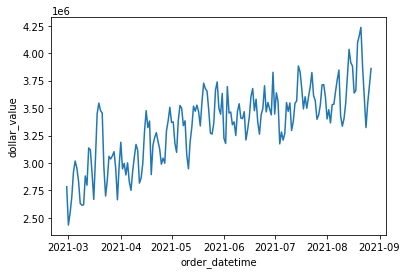

In [78]:
sns.lineplot(data=dollar_value_per_day)

/home/ryan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name'>

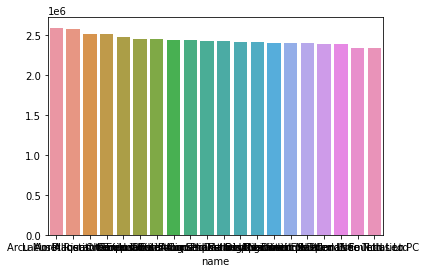

In [87]:
merchant_totals = transactions.groupby("name").sum()["dollar_value"].sort_values(ascending=False)[:20]
sns.barplot(merchant_totals.index, merchant_totals.values)